# Project Name :

# Predictive-Maintenance-Model

## Understand the Problem and Plan

### Objective

#### Predict the remaining time (MTTF) before failure for industrial equipment using provided sensor and operational data.

### Approach

#### 1.Analyze data for insights.
#### 2.Preprocess for quality.
#### 3.Build and validate a machine learning model.
#### 4.Optimize and deploy for real-world use.

## Load and Explore the Data

In [599]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [600]:
# Load the dataset
data = pd.read_excel('PM DATA Training.xlsx')

# Explore the first few rows
print(data.head())


   UID      ProductType  Humidity  Temperature  Age  Quantity  MTTF 
0    1         Extruder      5.88        66.17   13     39764     69
1    2  Pressure Cutter     42.76        40.29    4     45181    532
2    3         Extruder     76.62        52.08    4     70397     93
3    4             Pump     45.91        90.26   14     49470    183
4    5    Gauge Machine     78.87        58.56   12     45145    447


In [601]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UID,22314.0,NaN,NaN,NaN,11157.5,6441.641289,1.0,5579.25,11157.5,16735.75,22314.0
ProductType,22314,5,Gauge Machine,4579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Humidity,22314.0,NaN,NaN,NaN,52.384336,27.581977,5.0,28.59,51.96,76.725,99.98
Temperature,22314.0,NaN,NaN,NaN,64.440951,17.492267,35.01,49.4,64.085,79.66,95.0
Age,22314.0,NaN,NaN,NaN,8.983643,4.608867,1.0,5.0,9.0,13.0,17.0
Quantity,22314.0,NaN,NaN,NaN,51314.983956,16547.104891,23007.0,36878.0,51173.0,65598.0,79995.0
MTTF,22314.0,NaN,NaN,NaN,315.559514,155.476181,50.0,179.0,314.0,453.0,585.0


In [602]:
# Check for missing values and data types
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22314 entries, 0 to 22313
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UID          22314 non-null  int64  
 1   ProductType  22314 non-null  object 
 2   Humidity     22314 non-null  float64
 3   Temperature  22314 non-null  float64
 4   Age          22314 non-null  int64  
 5   Quantity     22314 non-null  int64  
 6   MTTF         22314 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.2+ MB
None


In [603]:
print(data.isnull().sum())
print(data.shape)

UID            0
ProductType    0
Humidity       0
Temperature    0
Age            0
Quantity       0
MTTF           0
dtype: int64
(22314, 7)


## Data Cleaning

#### Handle Missing Values: Replace or drop missing data.
#### Check for Duplicates: Remove duplicates if found.

In [604]:
# Drop duplicate rows
data = data.drop_duplicates()

# Handle missing values (example: fill with mean for numerical data)
data['Humidity'] = data['Humidity'].fillna(data['Humidity'].mean())
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())

# Verify no missing values remain
print(data.isnull().sum())
print(data.shape)


UID            0
ProductType    0
Humidity       0
Temperature    0
Age            0
Quantity       0
MTTF           0
dtype: int64
(22314, 7)


## Feature Engineering

#### 1.Categorical Encoding: Convert ProductType into numerical values.
#### 2.Feature Scaling: Scale features like Humidity, Temperature, Age, and Quantity.
#### 3.Feature Selection: Select only relevant columns.

In [605]:
# Define input (X) and target (y)
X = data[['ProductType', 'Humidity', 'Temperature', 'Age']]
y = data['MTTF ']

In [606]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Make a preprocessor:
# - One-hot encode the 'ProductType' column (text data)
# - Scale the number columns (make values smaller and equal size)
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), ['ProductType']),  # for text column
    ('num', StandardScaler(), ['Humidity', 'Temperature', 'Age'])  # for number columns
])

# Now apply this preprocessor to your data X
X = preprocessor.fit_transform(X)




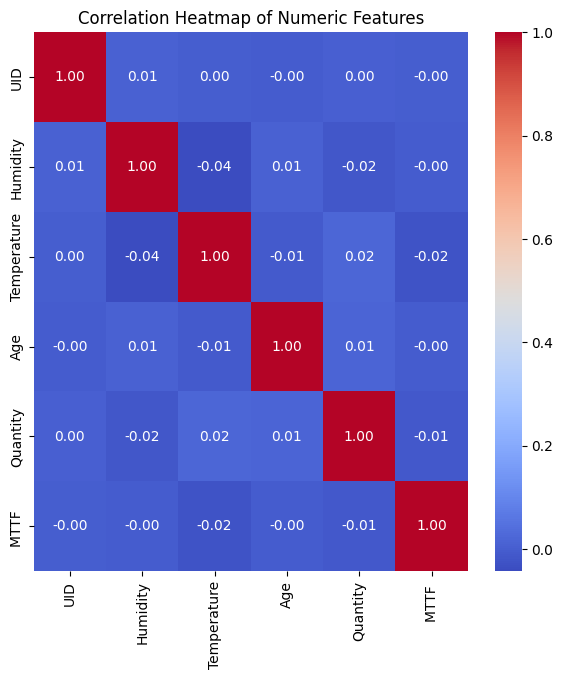

In [607]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is in a DataFrame called 'df'
# Select only numeric columns from the DataFrame
df_numeric = data.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title for clarity
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## Split Data for Training & Testing

In [608]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Train Multiple Models

### Linear Regression:

In [609]:
from sklearn.linear_model import LinearRegression

# Initialize and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(linear_model.score(X_train, y_train)*100, "%")
# Predict on test data
y_pred_lr = linear_model.predict(X_test)


0.19851611881808173 %


### Decision Tree Regressor:

In [610]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
print(dt_model.score(X_train, y_train)*100, "%"
)

# Predict on test data
y_pred_dtr = dt_model.predict(X_test)


100.0 %


### Random Forest Regressor:

In [611]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train)*100, "%"
)

# Predict on test data
y_pred_rfr = rf_model.predict(X_test)


99.24245518329266 %


### Support Vector Regressor (SVR):

In [612]:
from sklearn.svm import SVR

# Initialize and train a Support Vector Regressor model
svr_model = SVR()
svr_model.fit(X_train, y_train)
print(svr_model.score(X_train, y_train)*100, "%"
)

# Predict on test data
y_pred_svr = svr_model.predict(X_test)


1.130217176262338 %


### XGBoost Regressor model

In [613]:
from xgboost import XGBRegressor

# Initialize and train an XGBoost Regressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
print(xgb_model.score(X_train, y_train) * 100, "%")

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)


71.07641696929932 %


## Evaluate the Models

In [614]:


# Evaluate performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("Linear Regression")
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr)*100, "%")
print("\n")

print("Decision Tree Regressor")
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_pred_dtr))
print("R2 Score:", r2_score(y_test, y_pred_dtr)*100, "%")
print("\n")

print("Random Forest Regressor")
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_pred_rfr))
print("R2 Score:", r2_score(y_test, y_pred_rfr)*100, "%")
print("\n")

print("Support Vector Regressor (SVR)")
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr)*100, "%")
print("\n")

print("XGBoost Regressor")
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb)*100, "%")
print("\n")




Linear Regression
RMSE: 153.32940334834078
MAE: 132.31735282433166
R2 Score: 0.14123693651206803 %


Decision Tree Regressor
RMSE: 39.522979075115174
MAE: 5.925610575845844
R2 Score: 93.36509611926364 %


Random Forest Regressor
RMSE: 30.42738482739621
MAE: 11.74398834864441
R2 Score: 96.06753790415613 %


Support Vector Regressor (SVR)
RMSE: 153.16204925865716
MAE: 131.81054467362665
R2 Score: 0.3591032014928608 %


XGBoost Regressor
RMSE: 92.85736499801726
MAE: 73.9522705078125
R2 Score: 63.37581276893616 %




## Save the Model

In [615]:
best_model = dt_model.fit(X_train, y_train)

In [616]:
import joblib

# Save the trained model
joblib.dump(best_model, 'predictive_maintenance_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')



['preprocessor.pkl']